### Can we classify each phase as relatively low or high anxiety for each subject? ###

In [2]:
# IMPORTING MODULES
import glob
import importlib
import matplotlib.pyplot as plt
import numpy as np
import os
cvx_path = os.path.abspath(os.path.join('..', '..', 'cvxEDA', 'src'))
module_path = os.path.abspath(os.path.join('..', '..', 'src'))
import pandas as pd
import random
import scipy.signal as ss
import shap
import sys
sys.path.append(module_path)

import tools.data_reader_apd as dr
import tools.display_tools as dt
import tools.preprocessing as preprocessing
import train

from scipy.fft import fft, fftfreq, fftshift
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_validate, RepeatedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import normalize
from xgboost import XGBClassifier

import cvxopt.solvers
cvxopt.solvers.options['show_progress'] = False

import warnings
warnings.filterwarnings(
    "ignore", 
    category=RuntimeWarning
)

c:\Users\zhoux\AppData\Local\Programs\Python\Python37\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
importlib.reload(train)
importlib.reload(dr)

temp_a, _ = train.Train_APD.get_apd_data_ranking([train.Metrics.BPM], phases=dr.Phases.PHASES_LIST)
idx = temp_a[temp_a["bpm"] > 200].index 
invalid_apd_subjects = set(temp_a["subject"].iloc[idx].tolist())
idx = temp_a[temp_a["bpm"] < 35].index 
invalid_apd_subjects.update(set(temp_a["subject"].iloc[idx].tolist()))

Error in generating lf_hf_ratio


0    315
1     90
Name: label, dtype: int64
y_train:
0    274
1     77
Name: label, dtype: int64
y_test:
0    41
1    13
Name: label, dtype: int64
Model LogReg, Predictions: [0], [54]
Calculating shap values
Model RF, Predictions: [0 1], [53  1]
Calculating shap values
Model XGB, Predictions: [0 1], [46  8]
Calculating shap values
[[-0.09531454 -0.00465648  0.77103659  1.21579099  0.38023427  1.01083662
  -0.13306376  1.30730074]]
[[-0.09531454 -0.00465648  0.77103659  1.21579099  0.38023427  1.01083662
  -0.13306376  1.30730074]]


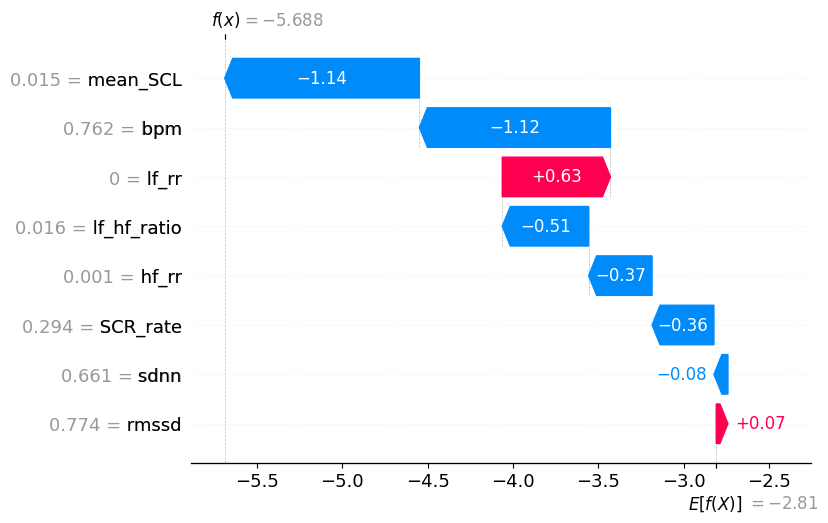

y_train:
0    273
1     78
Name: label, dtype: int64
y_test:
0    42
1    12
Name: label, dtype: int64
Model LogReg, Predictions: [0 1], [52  2]
Calculating shap values
Model RF, Predictions: [0 1], [48  6]
Calculating shap values
Model XGB, Predictions: [0 1], [45  9]
Calculating shap values
[[ 0.37680851 -0.04748302  0.55396779  1.07031911  0.46956348  0.92062386
  -0.33001233  1.34982308]]
[[ 0.37680851 -0.04748302  0.55396779  1.07031911  0.46956348  0.92062386
  -0.33001233  1.34982308]]


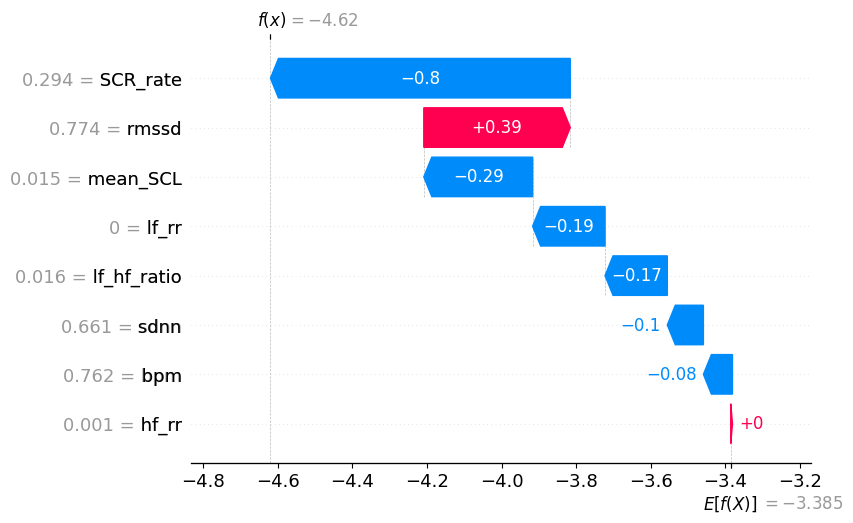

y_train:
0    276
1     75
Name: label, dtype: int64
y_test:
0    39
1    15
Name: label, dtype: int64
Model LogReg, Predictions: [0 1], [53  1]
Calculating shap values
Model RF, Predictions: [0 1], [46  8]
Calculating shap values
Model XGB, Predictions: [0 1], [45  9]
Calculating shap values
[[-0.08029176  0.21133431  0.98026278  1.18772197  0.1043366   1.00930439
   0.02899336  1.19476722]]
[[-0.08029176  0.21133431  0.98026278  1.18772197  0.1043366   1.00930439
   0.02899336  1.19476722]]


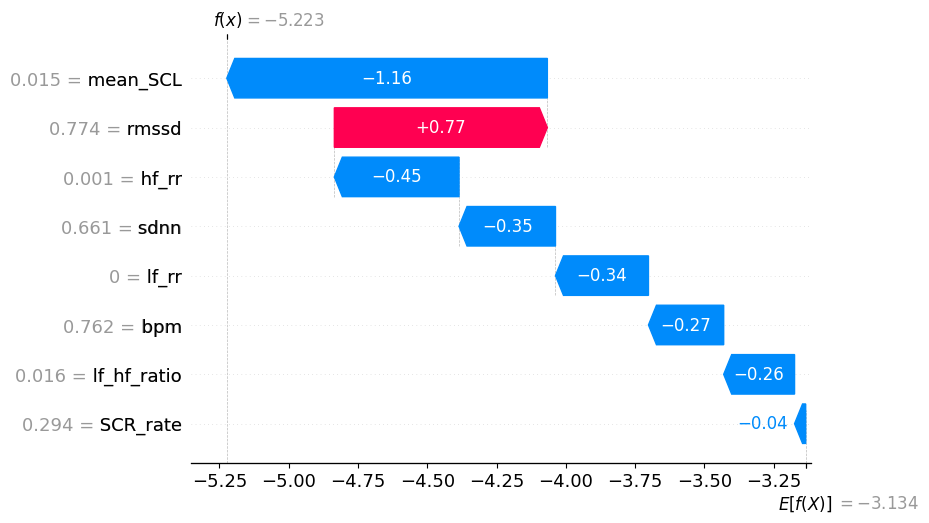

y_train:
0    275
1     76
Name: label, dtype: int64
y_test:
0    40
1    14
Name: label, dtype: int64
Model LogReg, Predictions: [0 1], [52  2]
Calculating shap values
Model RF, Predictions: [0 1], [51  3]
Calculating shap values
Model XGB, Predictions: [0 1], [49  5]
Calculating shap values
[[ 0.30673392  0.07558537  0.5839408   1.13146681  0.28432772  0.91156257
  -0.27785036  1.35957633]]
[[ 0.30673392  0.07558537  0.5839408   1.13146681  0.28432772  0.91156257
  -0.27785036  1.35957633]]


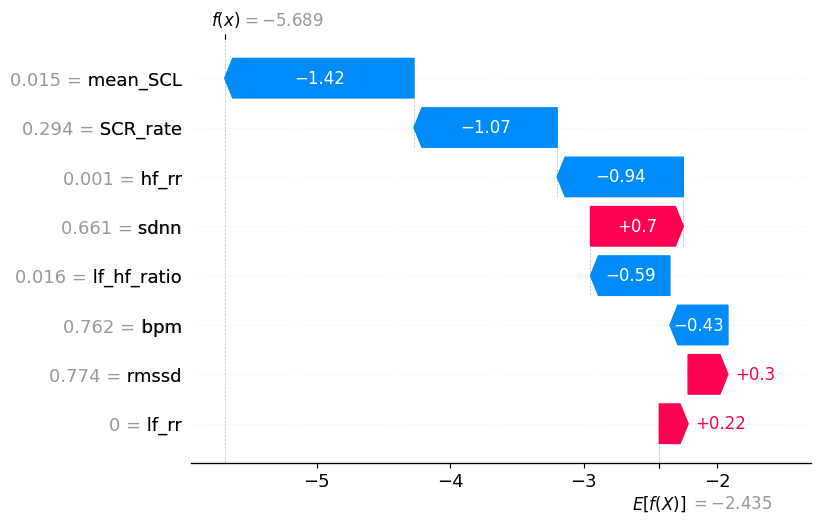

y_train:
0    280
1     71
Name: label, dtype: int64
y_test:
0    35
1    19
Name: label, dtype: int64
Model LogReg, Predictions: [0 1], [53  1]
Calculating shap values
Model RF, Predictions: [0 1], [52  2]
Calculating shap values
Model XGB, Predictions: [0 1], [52  2]
Calculating shap values
[[-0.24121269 -0.11086512  0.93626025  1.43827148  0.13815828  0.82702707
   0.15996608  1.06682546]]
[[-0.24121269 -0.11086512  0.93626025  1.43827148  0.13815828  0.82702707
   0.15996608  1.06682546]]


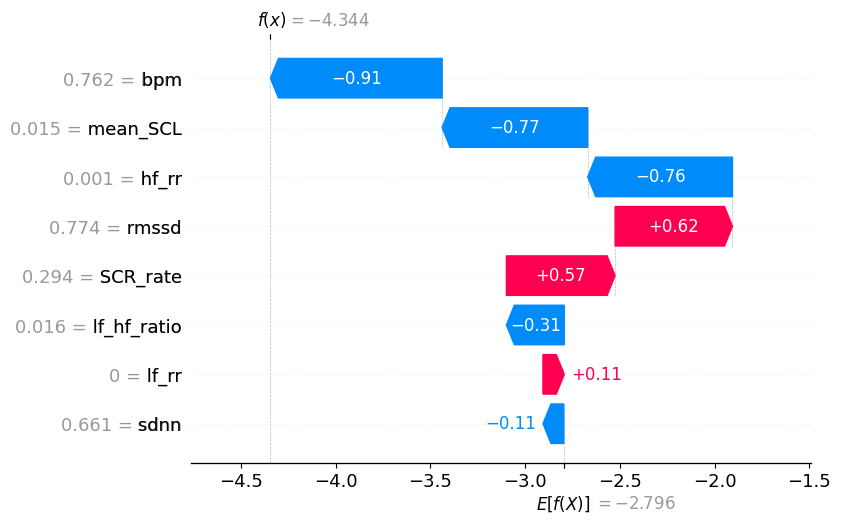

y_train:
0    276
1     75
Name: label, dtype: int64
y_test:
0    39
1    15
Name: label, dtype: int64
Model LogReg, Predictions: [0 1], [52  2]
Calculating shap values
Model RF, Predictions: [0 1], [50  4]
Calculating shap values
Model XGB, Predictions: [0 1], [46  8]
Calculating shap values
[[ 0.05891129  0.21208401  0.86860515  1.08481764  0.49755487  0.91813962
  -0.1790751   1.14070599]]
[[ 0.05891129  0.21208401  0.86860515  1.08481764  0.49755487  0.91813962
  -0.1790751   1.14070599]]


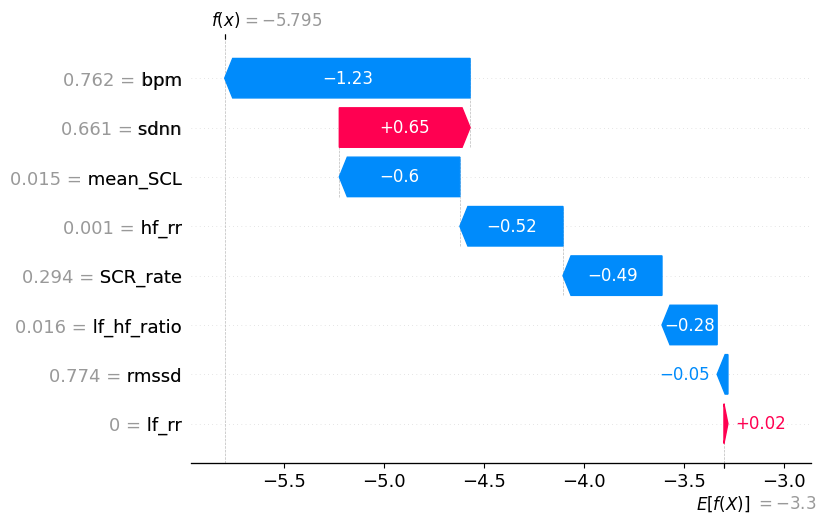

y_train:
0    272
1     79
Name: label, dtype: int64
y_test:
0    43
1    11
Name: label, dtype: int64
Model LogReg, Predictions: [0], [54]
Calculating shap values
Model RF, Predictions: [0 1], [51  3]
Calculating shap values
Model XGB, Predictions: [0 1], [47  7]
Calculating shap values
[[ 0.23586532 -0.04705036  0.78561063  1.17977992  0.2017651   0.9935567
  -0.04477417  1.30723769]]
[[ 0.23586532 -0.04705036  0.78561063  1.17977992  0.2017651   0.9935567
  -0.04477417  1.30723769]]


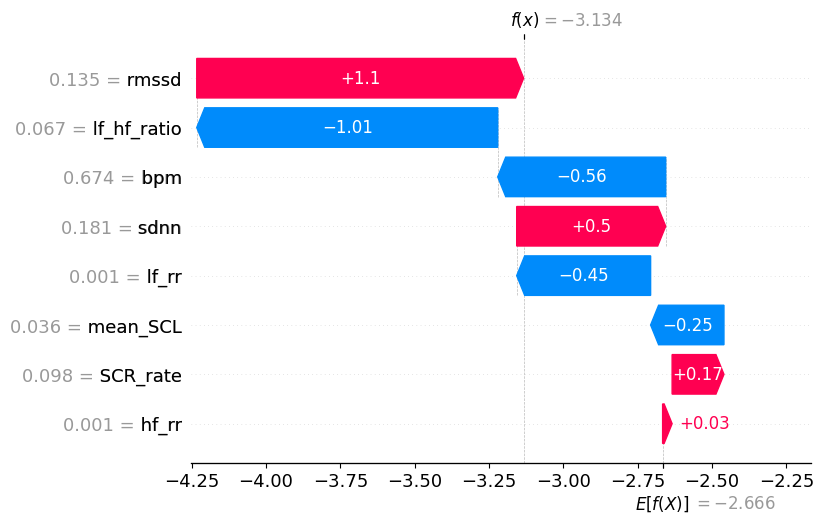

y_train:
0    275
1     76
Name: label, dtype: int64
y_test:
0    40
1    14
Name: label, dtype: int64
Model LogReg, Predictions: [0], [54]
Calculating shap values
Model RF, Predictions: [0 1], [53  1]
Calculating shap values
Model XGB, Predictions: [0 1], [51  3]
Calculating shap values
[[ 0.06365175  0.1101224   0.82913438  1.11992818  0.18535214  0.97050878
  -0.17254682  1.47720669]]
[[ 0.06365175  0.1101224   0.82913438  1.11992818  0.18535214  0.97050878
  -0.17254682  1.47720669]]


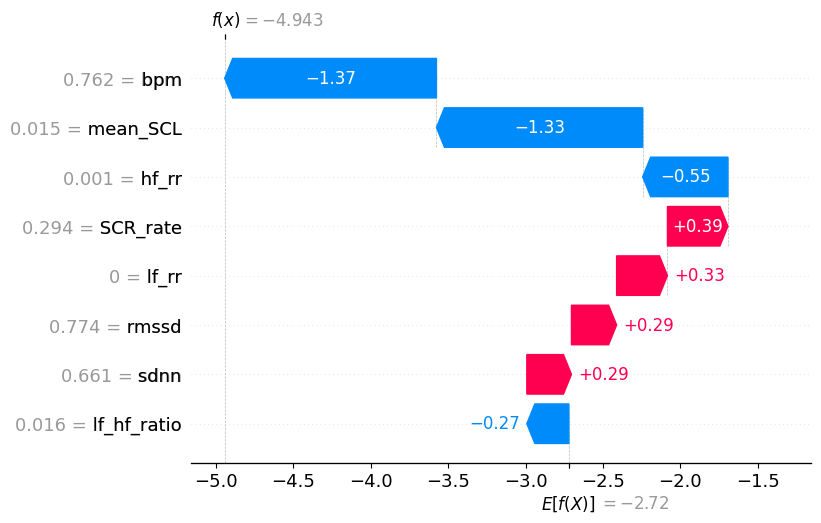

y_train:
0    285
1     66
Name: label, dtype: int64
y_test:
0    30
1    24
Name: label, dtype: int64
Model LogReg, Predictions: [0 1], [53  1]
Calculating shap values
Model RF, Predictions: [0 1], [49  5]
Calculating shap values
Model XGB, Predictions: [0 1], [46  8]
Calculating shap values
[[-0.11584049 -0.14400858  0.9621711   1.21996254  0.23876135  0.89125958
  -0.00628289  0.51801642]]
[[-0.11584049 -0.14400858  0.9621711   1.21996254  0.23876135  0.89125958
  -0.00628289  0.51801642]]


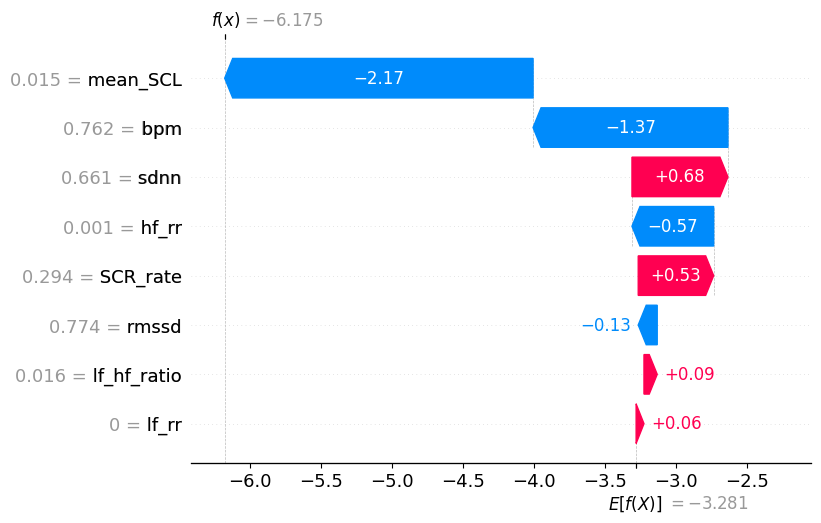

y_train:
0    272
1     79
Name: label, dtype: int64
y_test:
0    43
1    11
Name: label, dtype: int64
Model LogReg, Predictions: [0 1], [53  1]
Calculating shap values
Model RF, Predictions: [0 1], [52  2]
Calculating shap values
Model XGB, Predictions: [0 1], [49  5]
Calculating shap values
[[ 0.23817827  0.06114921  0.83439134  1.30455999  0.0960153   0.89443037
  -0.25802734  1.34976663]]
[[ 0.23817827  0.06114921  0.83439134  1.30455999  0.0960153   0.89443037
  -0.25802734  1.34976663]]


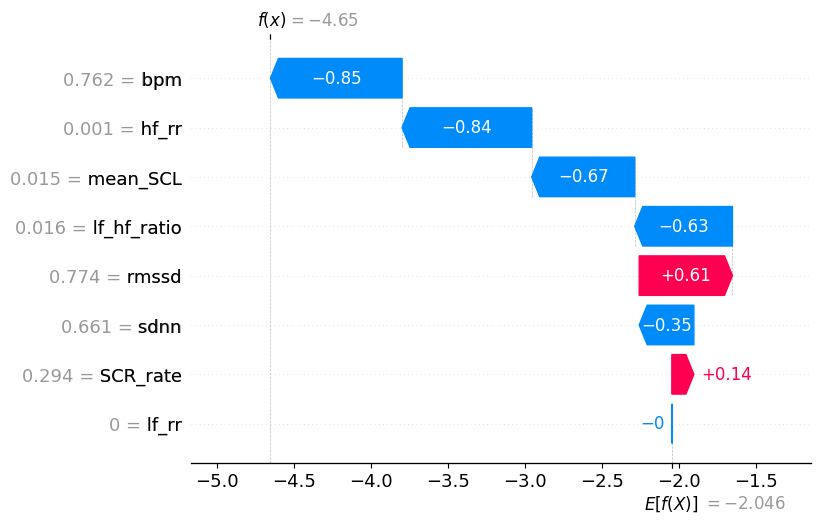

LogReg accuracy over 10 rounds: 0.7333333333333333
Model evaluation metrics for LogReg:
Precision: 0.45
Recall: 0.051973114604693546
F1-score: 0.09200280112044819
AUC score: 0.5217557880715775

RF accuracy over 10 rounds: 0.7314814814814815
Model evaluation metrics for RF:
Precision: 0.5508333333333333
Recall: 0.12756585519743416
F1-score: 0.19683309945748384
AUC score: 0.5434035298646682

XGB accuracy over 10 rounds: 0.7185185185185186
Model evaluation metrics for XGB:
Precision: 0.4646825396825397
Recall: 0.20430078693236586
F1-score: 0.2723722936924579
AUC score: 0.5595267956610763





In [6]:
# LOAD TRAIN AND TEST DATA
importlib.reload(train)
importlib.reload(dr)
importlib.reload(dt)


metrics = [
    train.Metrics.BPM, 
    train.Metrics.RMSSD, 
    train.Metrics.HF_RR, 
    train.Metrics.LF_RR, 
    # train.Metrics.IBI, 
    train.Metrics.SDNN, 
    train.Metrics.MEAN_SCL, 
    train.Metrics.SCR_RATE, 
]

model_phases = [
    "Baseline_Rest", 
    "BugBox_Relax", "BugBox_Anticipate", "BugBox_Exposure", "BugBox_Break",
    "Speech_Relax", "Speech_Anticipate", "Speech_Exposure", "Speech_Break"
]

models = {
    # "SVM": SVC(C=10, gamma=1),  # C=10, gamma=1
    # "KNN": KNeighborsClassifier(n_neighbors=7),
    # "DT": DecisionTreeClassifier(),
    "LogReg": LogisticRegression(max_iter=1000),
    # "Bayes": GaussianNB(),
    "RF": RandomForestClassifier(),
    "XGB": XGBClassifier(use_label_encoder=False, objective="binary:logistic", eval_metric="logloss")
}

threshold = "fixed"

anxiety_label_type = None
x, y = train.Train_APD.get_apd_data_ranking(metrics, model_phases, verbose=False, anxiety_label_type=anxiety_label_type, threshold=threshold, normalize=True)
x = x.drop(["phaseId"], axis=1)

# drop subjects with noisy data
x = x[~x["subject"].isin(invalid_apd_subjects)].reset_index(drop=True)
y = y[~y["subject"].isin(invalid_apd_subjects)].reset_index(drop=True)

if anxiety_label_type is not None:
    x.drop(labels=["anxietyGroup"], axis=1)
    
print(y.loc[:, "label"].value_counts())

acc_results = {
    # "SVM": [],
    "LogReg": [],
    "RF": [],
    "XGB": []
}
reports = {
    # "SVM": [],
    "LogReg": [],
    "RF": [],
    "XGB": []
}
num_iters = 10
get_shap = True
for _ in range(num_iters):
    out = train.train_predict(models, x, y, by_subject=True, save_metrics=True, test_size=0.15, is_resample=False, get_shap_values=get_shap, drop_subject=True)
    for model_name in acc_results:
        acc_results[model_name].append(out[model_name][0])
        reports[model_name].append(out[model_name][1])
        if get_shap:
            try:
                shap.plots.waterfall(out[model_name][2][0])
            except Exception as e:
                print(out[model_name][2])

for model_name in acc_results.keys():
    acc = np.mean(acc_results[model_name])
    print(f"{model_name} accuracy over {num_iters} rounds: {acc}")
    if acc > 0.5:
        print(f"Model evaluation metrics for {model_name}:")
        p = np.mean([report["precision"] for report in reports[model_name]])
        r = np.mean([report["recall"] for report in reports[model_name]])
        f1 = np.mean([report["f1"] for report in reports[model_name]])
        auc = np.mean([report["auc"] for report in reports[model_name]])
        report = reports[model_name]
        print(f"Precision: {p}\nRecall: {r}\nF1-score: {f1}\nAUC score: {auc}")
    print("")
print("\n")

In [ ]:
# LOAD TRAIN AND TEST DATA -- train on some phases and test on others
importlib.reload(train)
importlib.reload(dr)
importlib.reload(dt)

# metrics = train.Metrics.ALL
# metrics = train.Metrics.ECG \
    # + train.Metrics.EDA \
    # + train.Metrics.ANKLE + train.Metrics.WRIST

metrics = [
    train.Metrics.BPM, 
    train.Metrics.RMSSD, 
    # train.Metrics.HF_RR, 
    # train.Metrics.LF_RR, 
    train.Metrics.IBI, 
    train.Metrics.SDNN, 
    train.Metrics.MEAN_SCL, 
    train.Metrics.SCR_RATE, 
]

phases_a = [
    "Baseline_Rest", 
    "BugBox_Relax", 
    "BugBox_Anticipate", 
    # "BugBox_Exposure", 
    # "BugBox_Break",
    "Speech_Relax", 
    "Speech_Anticipate", 
    # "Speech_Exposure", 
    # "Speech_Break"
]

phases_b = [
    # "Baseline_Rest", 
    # "BugBox_Relax", 
    # "BugBox_Anticipate", 
    "BugBox_Exposure", 
    # "BugBox_Break",
    # "Speech_Relax", 
    # "Speech_Anticipate", 
    "Speech_Exposure", 
    # "Speech_Break"
]

models = {
    "SVM": SVC(C=10, gamma=1),  # C=10, gamma=1
    # "KNN": KNeighborsClassifier(n_neighbors=7),
    # "DT": DecisionTreeClassifier(),
    "LogReg": LogisticRegression(max_iter=1000),
    # "Bayes": GaussianNB(),
    "XGB": XGBClassifier(use_label_encoder=False, objective="binary:logistic", eval_metric="logloss")
}

anxiety_label_type = "Anxiety"
# anxiety_label_type = None
test_size = 1.0

x_a, y_a = train.Train_APD.get_apd_data_ranking(metrics, phases_a, verbose=False, anxiety_label_type=anxiety_label_type)
x_b, y_b = train.Train_APD.get_apd_data_ranking(metrics, phases_b, verbose=False, anxiety_label_type=anxiety_label_type)
x_a = x_a.drop(["phaseId"], axis=1)
x_b = x_b.drop(["phaseId"], axis=1)

# drop subjects with noisy data

x_a = x_a[~x_a["subject"].isin(invalid_apd_subjects)]
y_a = y_a[~y_a["subject"].isin(invalid_apd_subjects)]
x_b = x_b[~x_b["subject"].isin(invalid_apd_subjects)]
y_b = y_b[~y_b["subject"].isin(invalid_apd_subjects)]

print(f"y_a:\n{y_a.loc[:, 'label'].value_counts()}")
print(f"y_b:\n{y_b.loc[:, 'label'].value_counts()}")

# x = x[x['subject'] != 8.0]
# y = y[y['subject'] != 8.0]

if anxiety_label_type is not None:
    x_a.drop(labels=["anxietyGroup"], axis=1)
    x_b.drop(labels=["anxietyGroup"], axis=1)

# 0-1 scaling
for i in range(3, len(x_a.columns)):
    data_col = x_a[x_a.columns[i]]
    data_col = (data_col - data_col.min())/(data_col.max() - data_col.min())
    x_a[x_a.columns[i]] = data_col
for i in range(3, len(x_b.columns)):
    data_col = x_b[x_b.columns[i]]
    data_col = (data_col - data_col.min())/(data_col.max() - data_col.min())
    x_b[x_b.columns[i]] = data_col
    
# make sure subjects from different datasets aren't labeled with the same index
x_b["subject"] = x_b["subject"] + 500

acc_results = {
    "SVM": [],
    "LogReg": [],
    "XGB": []
}
reports = {
    "SVM": [],
    "LogReg": [],
    "XGB": []
}
num_iters = 10
for _ in range(num_iters):
    out = train.Train_Multi_Dataset.train_across_datasets(models, x_a, y_a, x_b, y_b, by_subject=False, save_metrics=True, test_size=test_size)
    for model_name in acc_results:
        acc_results[model_name].append(out[model_name][0])
        reports[model_name].append(out[model_name][1])

for model_name in acc_results.keys():
    acc = np.mean(acc_results[model_name])
    print(f"{model_name} accuracy over {num_iters} rounds: {acc}")
    if acc > 0.4:
        print(f"Model evaluation metrics for {model_name}:")
        p = np.mean([report["precision"] for report in reports[model_name]])
        r = np.mean([report["recall"] for report in reports[model_name]])
        f1 = np.mean([report["f1"] for report in reports[model_name]])
        auc = np.mean([report["auc"] for report in reports[model_name]])
        report = reports[model_name]
        print(f"Precision: {p}\nRecall: {r}\nF1-score: {f1}\nAUC score: {auc}")
    print("")
print("\n")

In [ ]:
# K-FOLD CROSS-VALIDATION
from sklearn.model_selection import KFold


metrics = [
    train.Metrics.BPM, 
    train.Metrics.RMSSD, 
    train.Metrics.HF_RR, 
    train.Metrics.LF_RR, 
    train.Metrics.IBI, 
    train.Metrics.SDNN, 
    train.Metrics.MEAN_SCL, 
    train.Metrics.SCR_RATE, 
]

model_phases = [
    [
        "Baseline_Rest", 
        "BugBox_Relax", "BugBox_Anticipate", "BugBox_Exposure", "BugBox_Break",
        "Speech_Relax", "Speech_Anticipate", "Speech_Exposure", "Speech_Break"
    ],
]

models = {
    "SVM": SVC(C=10, gamma=1),  # C=10, gamma=1
    # "KNN": KNeighborsClassifier(n_neighbors=7),
    # "DT": DecisionTreeClassifier(),
    "LogReg": LogisticRegression(max_iter=1000),
    # "Bayes": GaussianNB(),
    "XGB": XGBClassifier(use_label_encoder=False, objective="binary:logistic", eval_metric="logloss")
}

for phases in model_phases:
    print(f"PHASES: {phases} " + "-"*30)
    # anxiety_label_type = "Anxiety"
    anxiety_label_type = None
    x, y = train.Train_APD.get_apd_data_ranking(metrics, phases, verbose=False, anxiety_label_type=anxiety_label_type)
    x = x.drop(["phaseId"], axis=1)
    # drop subjects with noisy data
    x = x[~x["subject"].isin(invalid_apd_subjects)]
    y = y[~y["subject"].isin(invalid_apd_subjects)]
    # x = x[x['subject'] != 8.0]
    # y = y[y['subject'] != 8.0]

    if anxiety_label_type is not None:
        x.drop(labels=["anxietyGroup"], axis=1)
        
    print(y.loc[:, "label"].value_counts())

    # 0-1 scaling
    for i in range(3, len(x.columns)):
        data_col = x[x.columns[i]]
        data_col = (data_col - data_col.min())/(data_col.max() - data_col.min())
        x[x.columns[i]] = data_col

    acc_results = {
        "SVM": [],
        "LogReg": [],
        "XGB": []
    }
    reports = {
        "SVM": [],
        "LogReg": [],
        "XGB": []
    }

    # num_iters = 10
    num_iters = 1
    cv = KFold(n_splits=5, shuffle=True, random_state=1)

    for _ in range(num_iters):
        for model_name in acc_results:
            model = models[model_name]
            # scores = cross_validate(model, x, y, scoring=["accuracy", "precision", "recall", "f1", "roc_auc"], cv=5, n_jobs=-1)
            scores = cross_validate(model, x, y, scoring=["accuracy"], cv=5, n_jobs=-1)
            print(scores)
            reports[model_name].append(scores)
    
    print("\n")